<a href="https://colab.research.google.com/github/jedapeso/iberocloud/blob/main/AED_fase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis exploratorio de datos

In [25]:
# obtener el conjunto de datos

from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [26]:
df = pd.read_csv("/content/drive/MyDrive/Ibero/Colab.csv",encoding='latin-1',delimiter=';')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562219 entries, 0 to 562218
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Año             562219 non-null  int64  
 1   Mes             562219 non-null  object 
 2   Region          562219 non-null  object 
 3   Canal Venta     562219 non-null  object 
 4   Macrocategoria  562219 non-null  object 
 5   Categoría       562219 non-null  object 
 6   Subcategoria    562219 non-null  object 
 7   Venta           562219 non-null  float64
 8   Cantidad        562219 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 38.6+ MB
None


In [ ]:
col = ['Venta','Cantidad']
desccol = df[col].describe().round(2)
print(desccol)

              Venta   Cantidad
count  5.622190e+05  562219.00
mean   4.092674e+05      53.43
std    1.895343e+06     367.04
min    6.667000e+01    -429.00
25%    2.080000e+04       2.00
50%    6.636067e+04       5.00
75%    2.312920e+05      18.00
max    1.519897e+08   63550.00


In [ ]:
df.columns

Index(['Año', 'Mes', 'Region', 'Canal Venta', 'Macrocategoria', 'Categoría',
       'Subcategoria', 'Venta', 'Cantidad'],
      dtype='object')

In [ ]:
df.sample(5)

,Año,Mes,Region,Canal Venta,Macrocategoria,Categoría,Subcategoria,Venta,Cantidad
318337,2020,Dic,Valle,Mostrador,PRIMEROS AUXILIOS,APOSITOS PRIMEROS AUXILIOS,NORMAL APOSITOS,89390.00,14.0
242868,2022,Dic,Antioquia,Drogueria,ALERGIAS,ANTIPRURIGINOSOS ALERGIAS,ANTIHISTAMINICO,49200.00,1.0
183350,2022,Jul,Eje Cafetero,Call Center,PRIMEROS AUXILIOS,TERMOMETROS,DIGITAL,30966.00,2.0
175669,2022,Ago,Costa,Call Center,RESPIRATORIO,ANTITUSIVOS Y ANTISEPTICOS BUCALES,ANTITUSIVOS EXPECTORANTES,29040.00,1.0
449175,2022,Oct,Antioquia,Mostrador,RESPIRATORIO,ANTITUSIVOS Y ANTISEPTICOS BUCALES,ANTITUSIVOS EXPECTORANTES,316366.67,28.0


In [ ]:
# Métodos numéricos univariados

np.mean(df['Venta'])

varcol = np.var(df[col])
print(varcol)

stdcol = np.std(df[col])
print(stdcol)





Venta       3.592320e+12
Cantidad    1.347147e+05
dtype: float64
Venta       1.895342e+06
Cantidad    3.670350e+02
dtype: float64


In [ ]:
# Calcula la media y la desviación estándar para las dos columnas seleccionadas
media = df[col].mean()
desvi = df[col].std()

# Calcula el coeficiente de variación
coef_var_ini = desvi / media

#Redondear los valores a 2 decimales
coef_var = (round(coef_var_ini, 2))

# Muestra el coeficiente de variación para las dos columnas seleccionadas
print(coef_var)

Venta       4.63
Cantidad    6.87
dtype: float64


In [ ]:
# Medidas de posición: cuantiles = percentiles
# Desigualdades o distriuciones asimétricas

np.percentile(df['Venta'],50) # percentil 50
np.percentile(df['Cantidad'],list(range(0,101,10)))

array([-4.290e+02,  1.000e+00,  1.000e+00,  2.000e+00,  3.000e+00,
        5.000e+00,  8.000e+00,  1.300e+01,  2.600e+01,  7.100e+01,
        6.355e+04])

In [ ]:
# Frecuencias de la variable default
df['Canal Venta'].value_counts()

Drogueria      279091
Mostrador      126656
Call Center    105489
Ecommerce       50983
Name: Canal Venta, dtype: int64

In [ ]:
# Agrupa por 'Año' y 'Canal Venta' y calcula la suma de 'Venta' en cada grupo
total_ventas = df.groupby(['Año', 'Canal Venta'])['Venta'].sum()

# Calcula el porcentaje de 'Venta' en cada grupo con respecto al total de 'Venta' para ese 'Año'
resultv = total_ventas / total_ventas.groupby('Año').transform('sum') * 100

print(resultv)

Año   Canal Venta
2019  Call Center    11.130061
      Drogueria      84.129553
      Ecommerce       0.029010
      Mostrador       4.711376
2020  Call Center    13.390026
      Drogueria      73.814764
      Ecommerce       3.359642
      Mostrador       9.435568
2021  Call Center     9.280432
      Drogueria      75.556863
      Ecommerce       5.298777
      Mostrador       9.863928
2022  Call Center     8.269375
      Drogueria      80.093235
      Ecommerce       4.707436
      Mostrador       6.929954
Name: Venta, dtype: float64


In [ ]:
# Agrupa por 'Año' y 'Canal Venta' y calcula la suma de 'Cantidad' en cada grupo
total_cantidad = df.groupby(['Año', 'Canal Venta'])['Cantidad'].sum()

# Calcula el porcentaje de 'Cantidad' en cada grupo con respecto al total de 'Cantidades' para ese 'Año'
resultc = total_cantidad / total_cantidad.groupby('Año').transform('sum') * 100

print(resultc)

Año   Canal Venta
2019  Call Center     6.021345
      Drogueria      90.645710
      Ecommerce       0.012520
      Mostrador       3.320424
2020  Call Center     7.919930
      Drogueria      84.197499
      Ecommerce       1.690013
      Mostrador       6.192558
2021  Call Center     5.783504
      Drogueria      85.581130
      Ecommerce       2.914089
      Mostrador       5.721277
2022  Call Center     4.969956
      Drogueria      88.992959
      Ecommerce       2.481499
      Mostrador       3.555585
Name: Cantidad, dtype: float64


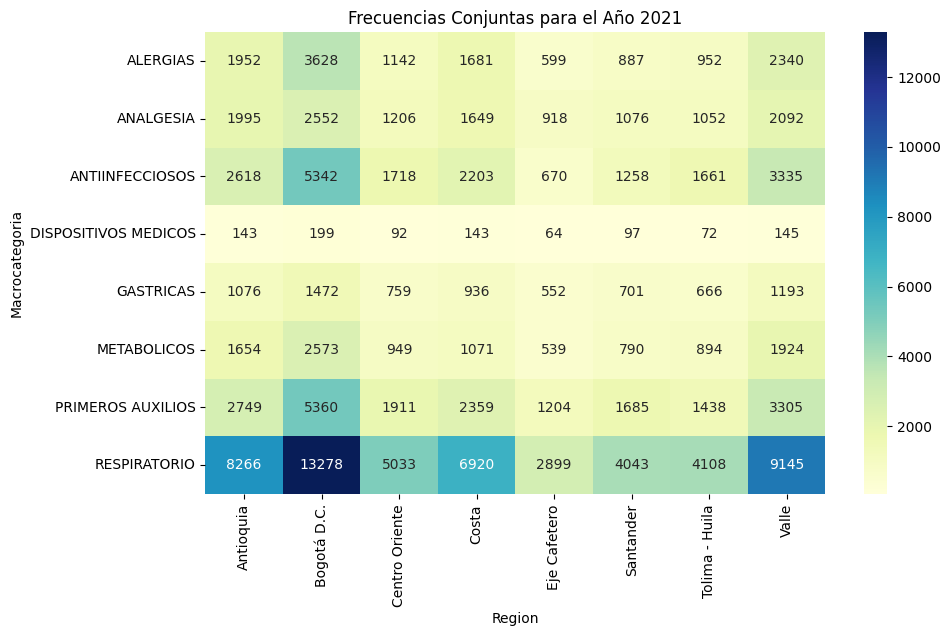

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Definir el año que quieres filtrar
año_deseado = 2021  # Reemplaza con el año que desees

# Aplicar el filtro por año
df_filtrado = df[df['Año'] == año_deseado]

# Calcular las frecuencias conjuntas de Macrocategoria y Region
frecuencias_conjuntas = pd.crosstab(df_filtrado['Macrocategoria'], df_filtrado['Region'])

# Crear un mapa de calor (heatmap) con Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(frecuencias_conjuntas, annot=True, cmap='YlGnBu', fmt='d')
plt.title(f'Frecuencias Conjuntas para el Año {año_deseado}')
plt.xlabel('Region')
plt.ylabel('Macrocategoria')
plt.show()


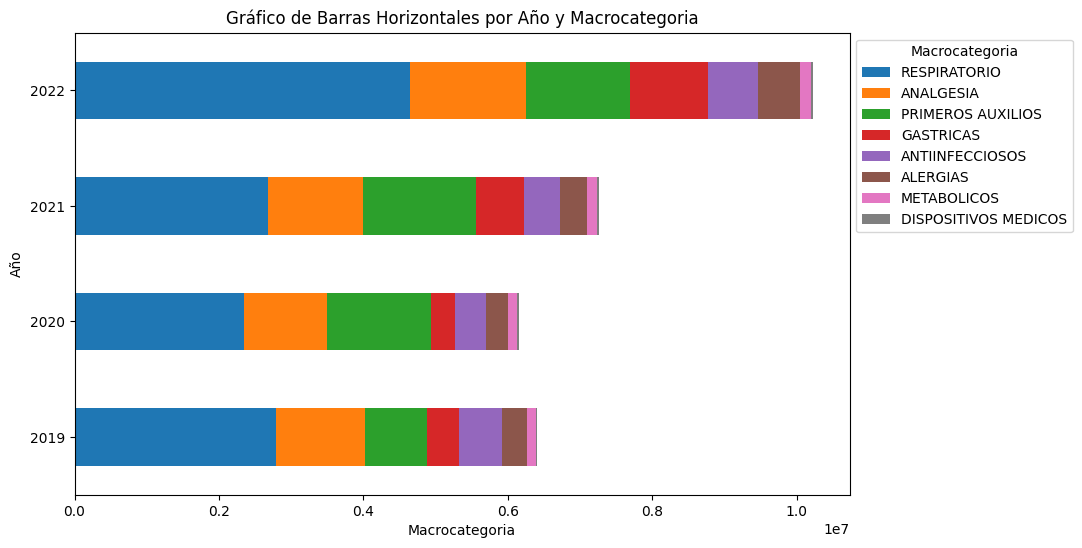

In [ ]:
# Agrupa los datos por 'Año' y 'Categoría' y calcula la suma de 'Cantidad'
grouped = df.groupby(['Año', 'Macrocategoria'])['Cantidad'].sum().unstack()

# Ordena las columnas en función de la cantidad total en el último año
grouped = grouped.sort_values(by=df['Año'].max(), axis=1, ascending=False)

# Crea un gráfico de barras horizontales apiladas
ax = grouped.plot(kind='barh', stacked=True, figsize=(10, 6))

# Etiquetas de datos en las barras
#for i in ax.containers:
#    ax.bar_label(i)

# Etiquetas del eje x e y
plt.xlabel('Macrocategoria')
plt.ylabel('Año')
plt.legend(title='Macrocategoria', bbox_to_anchor=(1, 1))

# Título del gráfico
plt.title('Gráfico de Barras Horizontales por Año y Macrocategoria')

# Mostrar el gráfico
plt.show()


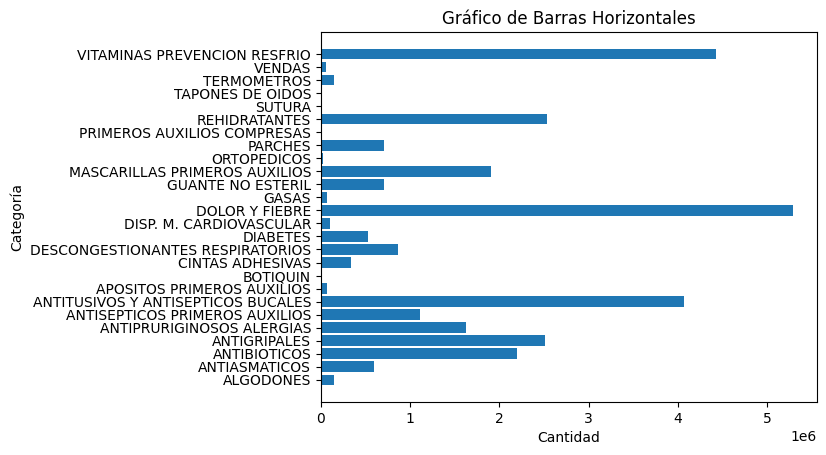

In [ ]:
import matplotlib.pyplot as plt

df_agrupado = df.groupby('Categoría')['Cantidad'].sum().reset_index()

# Grafico de barras horizontales
plt.barh(df_agrupado['Categoría'], df_agrupado['Cantidad'])

# Etiquetas del eje x e y
plt.xlabel('Cantidad')
plt.ylabel('Categoría')

# Título del gráfico
plt.title('Gráfico de Barras Horizontales')

# Mostrar el gráfico
plt.show()

